In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Problem Statement
In this data, we have one independent variable(Feature) "Hours of study" and one dependent variable(Target) "Marks". You have train a SVR model to understand the relationship between the Hours and the student to predict the student's marks based on their number of hours dedicated to studies.

# Importing the dataset

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv")

In [5]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
df.isnull().sum()

Hours of Study    0
Marks             0
dtype: int64

In [11]:
df.rename(columns={"Hours of Study":"Hours"},inplace=True)
#or you can use
#df.columns=["Hours","Marks"]

In [12]:
df.head()

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


Text(0.5, 1.0, 'Hours of Study V/s Marks')

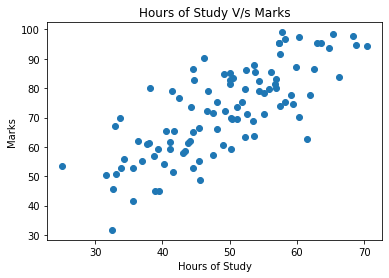

In [14]:
plt.scatter(df.Hours,df.Marks)
plt.xlabel("Hours of Study")
plt.ylabel("Marks")
plt.title("Hours of Study V/s Marks")

<AxesSubplot:>

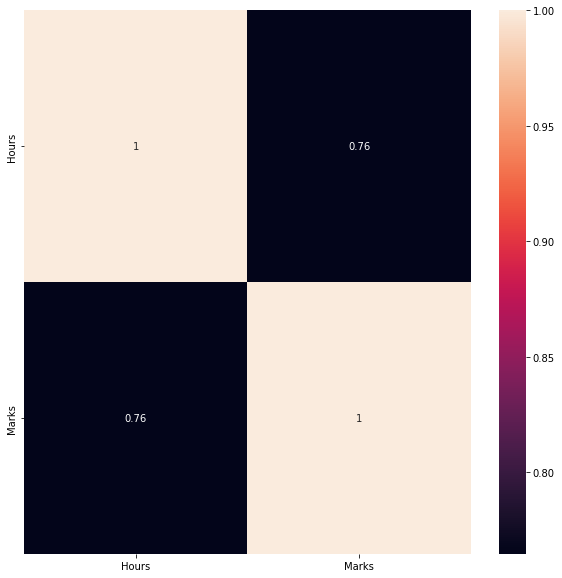

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

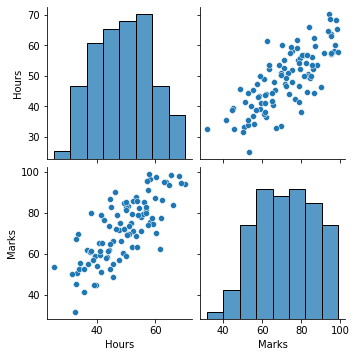

In [19]:
sns.pairplot(df)

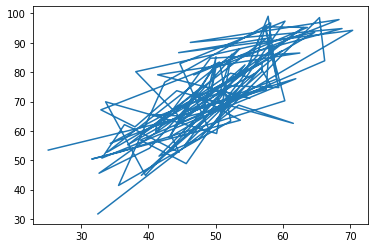

In [21]:
plt.plot(df.Hours,df.Marks)

# Feature Scalling

    Standardization
    Normalization

In [22]:
df.head()

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [ ]:
-1 to 1   #<- When you convert these data values in range of -1 to 1 it will increase the accuracy of the model and it helps us to improve the model
# And, our machine learning main aim is to increase the accuracy of model

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
x=np.array(df.Hours)
y=np.array(df.Marks)

In [25]:
x

array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
       55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
       45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
       48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754,
       66.18981661, 65.41605175, 47.48120861, 41.57564262, 51.84518691,
       59.37082201, 57.31000344, 63.61556125, 46.73761941, 50.55676015,
       52.22399609, 35.56783005, 42.43647694, 58.16454011, 57.50444762,
       45.44053073, 61.89622268, 33.09383174, 36.43600951, 37.67565486,
       44.55560838, 43.31828263, 50.07314563, 43.87061265, 62.99748075,
       32.66904376, 40.16689901, 53.57507753, 33.86421497, 64.70713867,
       38.11982403, 44.50253806, 40.59953838, 41.72067636, 51.08863468,
       55.0780959 , 41.37772653, 62.49469743, 49.20388754, 41.10268519,
       41.18201611, 50.18638949, 52.37844622, 50.13548549, 33.64470601,
       39.55790122, 56.13038882, 57.36205213, 60.26921439, 35.67

In [26]:
y

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319,
       83.87856466, 98.5912173 , 57.25181946, 51.39174408, 75.38065167,
       74.76556403, 95.45505292, 95.22936602, 79.05240617, 83.43207142,
       63.35879032, 41.4128853 , 76.61734128, 96.76956643, 74.08413012,
       66.58814441, 77.76848242, 50.71958891, 62.12457082, 60.81024665,
       52.68298337, 58.56982472, 82.90598149, 61.4247098 , 95.2441528 ,
       45.57058882, 54.0840548 , 87.99445276, 52.72549438, 93.57611869,
       80.16627545, 65.10171157, 65.56230126, 65.28088692, 73.43464155,
       71.13972786, 79.10282968, 86.52053844, 84.74269781, 59.35885025,
       61.68403752, 69.84760416, 86.09829121, 59.10883927, 69.89968164,
       44.86249071, 85.49806778, 95.53668685, 70.25193442, 52.72

In [30]:
df.iloc[0]

Hours    32.502345
Marks    31.707006
Name: 0, dtype: float64

In [32]:
df.iloc[0,]

Hours    32.502345
Marks    31.707006
Name: 0, dtype: float64

In [33]:
df.iloc[0,0]   #<- The last 0 after , will give the column index number

32.50234527

In [39]:
df.iloc[:,]

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [41]:
df.iloc[:,-1]  #<- it will give the last column values

0     31.707006
1     68.777596
2     62.562382
3     71.546632
4     87.230925
        ...    
95    81.536991
96    72.111832
97    85.232007
98    66.224958
99    53.454394
Name: Marks, Length: 100, dtype: float64

In [38]:
df.iloc[:,:-1]   #<- It will give all the columns values except the last one column

,Hours
0,32.502345
1,53.426804
2,61.530358
3,47.475640
4,59.813208
...,...
95,50.030174
96,49.239765
97,50.039576
98,48.149859


In [37]:
df.iloc[:,:-1].values  #<- This last values word will convert the DataFrame values into array

array([[32.50234527],
       [53.42680403],
       [61.53035803],
       [47.47563963],
       [59.81320787],
       [55.14218841],
       [52.21179669],
       [39.29956669],
       [48.10504169],
       [52.55001444],
       [45.41973014],
       [54.35163488],
       [44.1640495 ],
       [58.16847072],
       [56.72720806],
       [48.95588857],
       [44.68719623],
       [60.29732685],
       [45.61864377],
       [38.81681754],
       [66.18981661],
       [65.41605175],
       [47.48120861],
       [41.57564262],
       [51.84518691],
       [59.37082201],
       [57.31000344],
       [63.61556125],
       [46.73761941],
       [50.55676015],
       [52.22399609],
       [35.56783005],
       [42.43647694],
       [58.16454011],
       [57.50444762],
       [45.44053073],
       [61.89622268],
       [33.09383174],
       [36.43600951],
       [37.67565486],
       [44.55560838],
       [43.31828263],
       [50.07314563],
       [43.87061265],
       [62.99748075],
       [32

In [50]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [53]:
x

array([[32.50234527],
       [53.42680403],
       [61.53035803],
       [47.47563963],
       [59.81320787],
       [55.14218841],
       [52.21179669],
       [39.29956669],
       [48.10504169],
       [52.55001444],
       [45.41973014],
       [54.35163488],
       [44.1640495 ],
       [58.16847072],
       [56.72720806],
       [48.95588857],
       [44.68719623],
       [60.29732685],
       [45.61864377],
       [38.81681754],
       [66.18981661],
       [65.41605175],
       [47.48120861],
       [41.57564262],
       [51.84518691],
       [59.37082201],
       [57.31000344],
       [63.61556125],
       [46.73761941],
       [50.55676015],
       [52.22399609],
       [35.56783005],
       [42.43647694],
       [58.16454011],
       [57.50444762],
       [45.44053073],
       [61.89622268],
       [33.09383174],
       [36.43600951],
       [37.67565486],
       [44.55560838],
       [43.31828263],
       [50.07314563],
       [43.87061265],
       [62.99748075],
       [32

In [52]:
y   #<- you have to convert this y array into shape of (-1,1) for use it in model

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319,
       83.87856466, 98.5912173 , 57.25181946, 51.39174408, 75.38065167,
       74.76556403, 95.45505292, 95.22936602, 79.05240617, 83.43207142,
       63.35879032, 41.4128853 , 76.61734128, 96.76956643, 74.08413012,
       66.58814441, 77.76848242, 50.71958891, 62.12457082, 60.81024665,
       52.68298337, 58.56982472, 82.90598149, 61.4247098 , 95.2441528 ,
       45.57058882, 54.0840548 , 87.99445276, 52.72549438, 93.57611869,
       80.16627545, 65.10171157, 65.56230126, 65.28088692, 73.43464155,
       71.13972786, 79.10282968, 86.52053844, 84.74269781, 59.35885025,
       61.68403752, 69.84760416, 86.09829121, 59.10883927, 69.89968164,
       44.86249071, 85.49806778, 95.53668685, 70.25193442, 52.72

In [54]:
y=y.reshape(-1,1)

In [55]:
y

array([[31.70700585],
       [68.77759598],
       [62.5623823 ],
       [71.54663223],
       [87.23092513],
       [78.21151827],
       [79.64197305],
       [59.17148932],
       [75.3312423 ],
       [71.30087989],
       [55.16567715],
       [82.47884676],
       [62.00892325],
       [75.39287043],
       [81.43619216],
       [60.72360244],
       [82.89250373],
       [97.37989686],
       [48.84715332],
       [56.87721319],
       [83.87856466],
       [98.5912173 ],
       [57.25181946],
       [51.39174408],
       [75.38065167],
       [74.76556403],
       [95.45505292],
       [95.22936602],
       [79.05240617],
       [83.43207142],
       [63.35879032],
       [41.4128853 ],
       [76.61734128],
       [96.76956643],
       [74.08413012],
       [66.58814441],
       [77.76848242],
       [50.71958891],
       [62.12457082],
       [60.81024665],
       [52.68298337],
       [58.56982472],
       [82.90598149],
       [61.4247098 ],
       [95.2441528 ],
       [45

In [56]:
stanscale=StandardScaler()

In [57]:
x=stanscale.fit_transform(x)
y=stanscale.fit_transform(y)

In [58]:
x   #All the values are converted in range of -1 to 1

array([[-1.69692744e+00],
       [ 4.60783817e-01],
       [ 1.29641497e+00],
       [-1.52894871e-01],
       [ 1.11934400e+00],
       [ 6.37672702e-01],
       [ 3.35493359e-01],
       [-9.96004115e-01],
       [-8.79915004e-02],
       [ 3.70370068e-01],
       [-3.64898398e-01],
       [ 5.56151537e-01],
       [-4.94383049e-01],
       [ 9.49740196e-01],
       [ 8.01118494e-01],
       [-2.52939962e-04],
       [-4.40436632e-01],
       [ 1.16926591e+00],
       [-3.44386604e-01],
       [-1.04578477e+00],
       [ 1.77689413e+00],
       [ 1.69710419e+00],
       [-1.52320603e-01],
       [-7.61297225e-01],
       [ 2.97688891e-01],
       [ 1.07372557e+00],
       [ 8.61215827e-01],
       [ 1.51143924e+00],
       [-2.28998849e-01],
       [ 1.64827489e-01],
       [ 3.36751351e-01],
       [-1.38081742e+00],
       [-6.72528769e-01],
       [ 9.49334875e-01],
       [ 8.81266735e-01],
       [-3.62753460e-01],
       [ 1.33414261e+00],
       [-1.63593389e+00],
       [-1.2

In [59]:
y

array([[-2.66651176],
       [-0.21538463],
       [-0.62633786],
       [-0.03229448],
       [ 1.00475931],
       [ 0.40839133],
       [ 0.50297376],
       [-0.85054551],
       [ 0.21794595],
       [-0.04854375],
       [-1.11541194],
       [ 0.69054936],
       [-0.66293287],
       [ 0.22202084],
       [ 0.62160848],
       [-0.74791896],
       [ 0.71790058],
       [ 1.67581471],
       [-1.5331961 ],
       [-1.00224427],
       [ 0.78309945],
       [ 1.75590787],
       [-0.9774751 ],
       [-1.3649464 ],
       [ 0.22121292],
       [ 0.180543  ],
       [ 1.54854301],
       [ 1.53362047],
       [ 0.46399128],
       [ 0.75357708],
       [-0.57367894],
       [-2.02475385],
       [ 0.3029835 ],
       [ 1.63545934],
       [ 0.13548623],
       [-0.36015233],
       [ 0.37909756],
       [-1.40938966],
       [-0.65528619],
       [-0.74219   ],
       [-1.27956897],
       [-0.89032789],
       [ 0.71879173],
       [-0.70156137],
       [ 1.53459818],
       [-1

# Splitting the data

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [61]:
x_train.shape

(80, 1)

In [62]:
len(x_train)

80

In [63]:
y_train.shape

(80, 1)

# Define the model

In [64]:
from sklearn.svm import SVR

In [66]:
model=SVR(kernel="rbf")  #<- There are many different type of kernels, you can use it from the documentation

# Fit the data

In [67]:
model.fit(x_train,y_train)

c:\users\hello\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [69]:
y_pred=model.predict(x_test)

In [71]:
y_pred   #<- Here, value in standardize form, so you can either compare in this form or you can reverse it to the original form

array([-0.76947139,  0.62495329, -0.36605346, -1.26283815,  0.57381597,
       -0.1185472 , -0.75664008, -0.40417142, -0.99623181,  0.95262628,
        1.07387222,  0.35030893, -0.56328734, -0.52093818,  0.07543078,
        1.22551728,  1.33758452,  0.67596748, -0.56967027, -0.64786557])

In [70]:
y_test

array([[-1.00224427],
       [ 0.62160848],
       [-0.70156137],
       [-1.40938966],
       [ 0.89018186],
       [-0.03229448],
       [-1.79768014],
       [-0.89032789],
       [-0.65528619],
       [-0.11790059],
       [-0.62633786],
       [-0.21538463],
       [-0.68441449],
       [-0.44658889],
       [ 0.62827334],
       [ 1.46933383],
       [ 1.50879256],
       [ 1.54854301],
       [-0.8381571 ],
       [-1.18692938]])

In [72]:
y_pred=stanscale.inverse_transform(y_pred)

In [73]:
y_pred

array([60.39764577, 81.48677868, 66.49889641, 52.93601862, 80.71338315,
       70.24215505, 60.59170512, 65.92240434, 56.96814488, 86.44247075,
       88.27618157, 77.33308614, 63.51595177, 64.15643611, 73.17585776,
       90.56964555, 92.26453877, 82.25831189, 63.41941707, 62.23679956])

In [74]:
y_test=stanscale.inverse_transform(y_test)

In [75]:
y_test

array([[56.87721319],
       [81.43619216],
       [61.4247098 ],
       [50.71958891],
       [85.49806778],
       [71.54663223],
       [44.84712424],
       [58.56982472],
       [62.12457082],
       [70.25193442],
       [62.5623823 ],
       [68.77759598],
       [61.68403752],
       [65.28088692],
       [81.53699078],
       [94.25710159],
       [94.85387123],
       [95.45505292],
       [59.35885025],
       [54.0840548 ]])

Text(0.5, 1.0, 'Actual Marks V/s Predicted Marks')

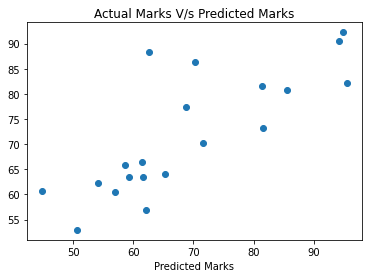

In [77]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Marks")
plt.xlabel("Predicted Marks")
plt.title("Actual Marks V/s Predicted Marks")

# Accuracy of model

In [80]:
stanscale.inverse_transform(model.predict([[5]]))

array([71.50453478])

In [81]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [82]:
model.score(x_test,y_test)

-22.099949752331796

In [83]:
r2_score(y_test,y_pred)

0.5943071038285547

# Prediction of the model

In [84]:
mean_squared_error(y_test,y_pred)

87.23306900235274

In [85]:
mean_absolute_error(y_test,y_pred)

6.933427431006029

# Without feature scalling

In [86]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [87]:
x

array([[32.50234527],
       [53.42680403],
       [61.53035803],
       [47.47563963],
       [59.81320787],
       [55.14218841],
       [52.21179669],
       [39.29956669],
       [48.10504169],
       [52.55001444],
       [45.41973014],
       [54.35163488],
       [44.1640495 ],
       [58.16847072],
       [56.72720806],
       [48.95588857],
       [44.68719623],
       [60.29732685],
       [45.61864377],
       [38.81681754],
       [66.18981661],
       [65.41605175],
       [47.48120861],
       [41.57564262],
       [51.84518691],
       [59.37082201],
       [57.31000344],
       [63.61556125],
       [46.73761941],
       [50.55676015],
       [52.22399609],
       [35.56783005],
       [42.43647694],
       [58.16454011],
       [57.50444762],
       [45.44053073],
       [61.89622268],
       [33.09383174],
       [36.43600951],
       [37.67565486],
       [44.55560838],
       [43.31828263],
       [50.07314563],
       [43.87061265],
       [62.99748075],
       [32

In [91]:
y=y.reshape(-1,1)

In [92]:
y

array([[31.70700585],
       [68.77759598],
       [62.5623823 ],
       [71.54663223],
       [87.23092513],
       [78.21151827],
       [79.64197305],
       [59.17148932],
       [75.3312423 ],
       [71.30087989],
       [55.16567715],
       [82.47884676],
       [62.00892325],
       [75.39287043],
       [81.43619216],
       [60.72360244],
       [82.89250373],
       [97.37989686],
       [48.84715332],
       [56.87721319],
       [83.87856466],
       [98.5912173 ],
       [57.25181946],
       [51.39174408],
       [75.38065167],
       [74.76556403],
       [95.45505292],
       [95.22936602],
       [79.05240617],
       [83.43207142],
       [63.35879032],
       [41.4128853 ],
       [76.61734128],
       [96.76956643],
       [74.08413012],
       [66.58814441],
       [77.76848242],
       [50.71958891],
       [62.12457082],
       [60.81024665],
       [52.68298337],
       [58.56982472],
       [82.90598149],
       [61.4247098 ],
       [95.2441528 ],
       [45

# Splitting the data

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [97]:
x_train.shape

(80, 1)

In [62]:
len(x_train)

80

In [63]:
y_train.shape

(80, 1)

# Define the model

In [93]:
from sklearn.svm import SVR

In [94]:
model=SVR(kernel="rbf")  #<- There are many different type of kernels, you can use it from the documentation

# Fit the data

In [98]:
model.fit(x_train,y_train)

c:\users\hello\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [99]:
y_pred=model.predict(x_test)

In [100]:
y_pred   #<- Here, value in standardize form, so you can either compare in this form or you can reverse it to the original form

array([64.65277623, 79.56904405, 67.6224643 , 64.55303703, 79.12461867,
       70.72515467, 64.70399066, 67.20782004, 64.11667196, 81.30677898,
       81.50735697, 76.7197672 , 65.78988806, 66.11698842, 73.25546108,
       77.76023386, 78.84472977, 79.96501514, 65.74362897, 65.23787887])

In [101]:
y_test

array([[56.87721319],
       [81.43619216],
       [61.4247098 ],
       [50.71958891],
       [85.49806778],
       [71.54663223],
       [44.84712424],
       [58.56982472],
       [62.12457082],
       [70.25193442],
       [62.5623823 ],
       [68.77759598],
       [61.68403752],
       [65.28088692],
       [81.53699078],
       [94.25710159],
       [94.85387123],
       [95.45505292],
       [59.35885025],
       [54.0840548 ]])

Text(0.5, 1.0, 'Actual Marks V/s Predicted Marks')

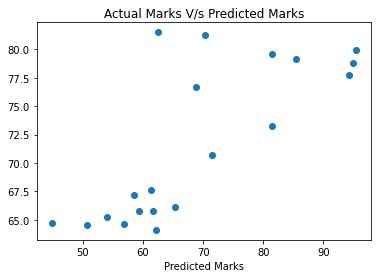

In [102]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Marks")
plt.xlabel("Predicted Marks")
plt.title("Actual Marks V/s Predicted Marks")

# Prediction of the model

In [103]:
model.score(x_test,y_test)

0.44847831055675946

In [104]:
r2_score(y_test,y_pred)

0.44847831055675946

In [105]:
mean_squared_error(y_test,y_pred)

118.58952928563171

In [106]:
mean_absolute_error(y_test,y_pred)

9.202796263984874